# 🧑‍🏫 Aula: Grafos Eulerianos e Hamiltonianos

## 📚 Introdução

Nesta aula, vamos estudar dois tipos fundamentais de grafos: **Eulerianos** e **Hamiltonianos**. Eles têm aplicações em roteirização, jogos, redes e problemas clássicos da matemática.

## 🔗 O que é um Grafo?

Um **grafo** é uma estrutura composta por vértices (nós) e arestas (ligações entre pares de vértices).

- **Vértices (nós):** Pontos do grafo.
- **Arestas:** Conexões entre os vértices.

### Definição Matemática

$$
G = (V, E)
$$

- $V$ = conjunto de vértices
- $E$ = conjunto de arestas (pares de vértices)

## 🌉 Grafos Eulerianos

### Definição

Um **grafo euleriano** possui um ciclo fechado que percorre todas as arestas exatamente uma vez.

- **Caminho euleriano:** percorre todas as arestas uma única vez (não precisa ser fechado).
- **Ciclo euleriano:** começa e termina no mesmo vértice.

### Teorema de Euler

> Um grafo conexo é euleriano se, e somente se, todos os seus vértices têm grau par.

### Exemplo prático: Grafo Euleriano


Arestas do grafo: [('a', 'b'), ('a', 'd'), ('a', 'c'), ('b', 'c'), ('b', 'd'), ('c', 'd')]
O grafo é Euleriano? False
Não existe ciclo Euleriano neste grafo.


d:\GitHub\NewtonPaiva\TeoriaGrafos\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127753 (\N{BRIDGE AT NIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


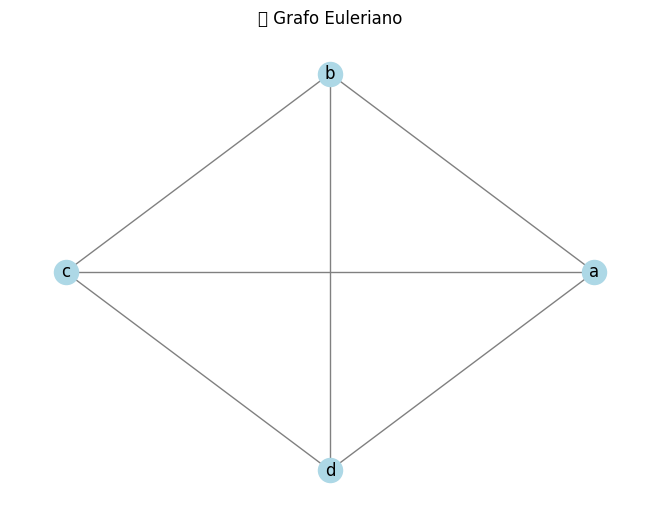

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo euleriano
G = nx.Graph()
edges = [('a', 'b'), ('b', 'c'), ('c', 'd'), ('d', 'a'), ('a', 'c'), ('b', 'd')]
G.add_edges_from(edges)
print("Arestas do grafo:", G.edges())

# Verificando se é Euleriano
print("O grafo é Euleriano?", nx.is_eulerian(G))

# Encontrando ciclo Euleriano (se existir)
if nx.is_eulerian(G):
    ciclo = list(nx.eulerian_circuit(G))
    print("Ciclo Euleriano encontrado:", ciclo)
else:
    print("Não existe ciclo Euleriano neste grafo.")

# Plotando o grafo
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("🌉 Grafo Euleriano")
plt.show()

## 📝 Passos para identificar um grafo Euleriano

1. Calcule o grau de cada vértice.
2. Verifique se todos os vértices têm grau par.
3. O grafo deve ser conexo.

Se todas as condições forem satisfeitas, o grafo é Euleriano.

## 🔄 Algoritmo de Fleury (Exemplo)

O Algoritmo de Fleury encontra um caminho ou ciclo Euleriano evitando pontes sempre que possível.


In [2]:
import networkx as nx

def fleury_algorithm(G, start=None):
    if not nx.is_eulerian(G) and not nx.has_eulerian_path(G):
        return None

    G = G.copy()
    if start is None:
        start = list(G.nodes())[0]
    path = [start]
    u = start

    while G.edges(u):
        for v in list(G.neighbors(u)):
            # Verifica se a aresta é ponte
            G.remove_edge(u, v)
            is_bridge = not nx.is_connected(G)
            G.add_edge(u, v)
            if not is_bridge or len(G.edges(u)) == 1:
                path.append(v)
                G.remove_edge(u, v)
                u = v
                print(f"Passo: {path}")
                break
    return path

# Exemplo de uso
G = nx.Graph()
edges = [('a', 'b'), ('b', 'c'), ('c', 'd'), ('d', 'a'), ('a', 'c'), ('b', 'd')]
G.add_edges_from(edges)
print("Caminho Euleriano pelo algoritmo de Fleury:", fleury_algorithm(G, start='a'))

Caminho Euleriano pelo algoritmo de Fleury: None


## 🧭 Grafos Hamiltonianos

### Definição

Um **grafo hamiltoniano** possui um ciclo fechado que passa por todos os vértices exatamente uma vez.

- **Caminho hamiltoniano:** passa por todos os vértices uma única vez (não precisa ser fechado).
- **Ciclo hamiltoniano:** começa e termina no mesmo vértice.

### Teorema de Dirac

> Se um grafo simples com $n \geq 3$ vértices tem grau de cada vértice maior ou igual a $n/2$, então ele é hamiltoniano.

### Exemplo prático: Grafo Hamiltoniano


Arestas do grafo: [(0, 1), (0, 4), (1, 2), (2, 3), (3, 4)]
Passo: [0, 1, 2, 3, 4]
Passo: [0, 1, 2, 3]
Passo: [0, 1, 2]
Passo: [0, 1]
Ciclo Hamiltoniano: [0, 1, 2, 3, 4, 0]


d:\GitHub\NewtonPaiva\TeoriaGrafos\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


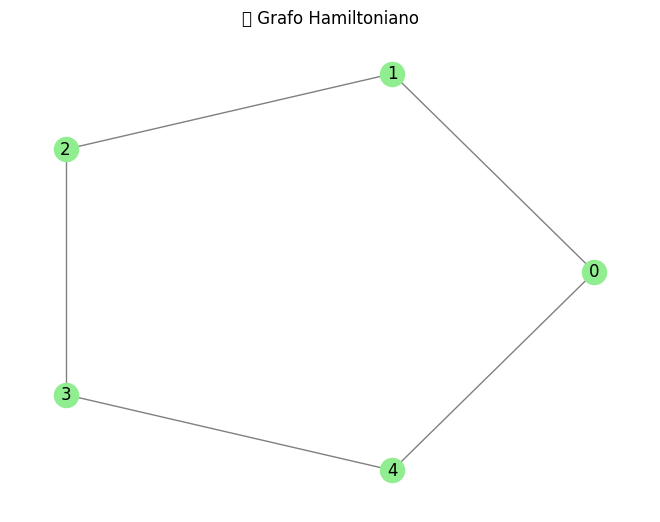

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Criando um grafo hamiltoniano (ciclo simples)
H = nx.cycle_graph(5)
print("Arestas do grafo:", H.edges())

# Função para encontrar ciclo hamiltoniano (força bruta)
def hamiltonian_path(G, path=[]):
    if not path:
        path = [list(G.nodes)[0]]
    if len(path) == len(G):
        if G.has_edge(path[0], path[-1]):
            return path + [path[0]]
        else:
            return None
    for v in set(G.nodes) - set(path):
        if G.has_edge(path[-1], v):
            res = hamiltonian_path(G, path + [v])
            if res:
                print(f"Passo: {path + [v]}")
                return res
    return None

ciclo = hamiltonian_path(H)
print("Ciclo Hamiltoniano:", ciclo)

# Plotando o grafo
nx.draw_circular(H, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title("🧭 Grafo Hamiltoniano")
plt.show()

## 📝 Passos para identificar um grafo Hamiltoniano

1. Verifique se o grafo é conexo.
2. Tente construir um ciclo que passe por todos os vértices uma única vez.
3. Use teoremas como o de Dirac ou Ore para condições suficientes.

Encontrar ciclos Hamiltonianos é difícil em geral (problema NP-completo).

## 🏁 Resumo

- **Euleriano:** percorre todas as arestas uma vez.
- **Hamiltoniano:** percorre todos os vértices uma vez.
- NetworkX facilita a verificação e visualização desses conceitos.

---